In [1]:
import os
import random
import shutil
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models  
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.applications import MobileNetV2
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint
import os
import hashlib
from collections import defaultdict
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
#Define main dataset
dataset_path = '/Users/rajendarbore/Downloads/Yamini Project/PokemonData'

In [ ]:

# Prepare data summary
summary = []

# Loop through subfolders (classes)
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Count image files with valid extensions
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        summary.append({
            'Class': class_name,
            'Number of Images': len(image_files)
        })

# Convert to DataFrame for easier display
df_summary = pd.DataFrame(summary)

# Display EDA results
print(f"Total number of classes (subfolders): {len(df_summary)}\n")
print("Number of images per class:\n")
print(df_summary.sort_values(by='Number of Images', ascending=False).to_string(index=False))


Total number of classes (subfolders): 150

Number of images per class:

           Class  Number of Images
        Venusaur                66
         Pikachu                62
         Snorlax                59
        Vaporeon                59
         Scyther                57
       Vileplume                56
      Wigglytuff                56
         Spearow                55
          Mankey                55
         Voltorb                55
          Horsea                54
          Tauros                54
             Mew                54
          Lapras                53
         Tangela                53
         Metapod                53
         Machamp                53
        Nidoking                52
          Mewtwo                52
        Venomoth                52
       Nidoqueen                52
        Squirtle                52
        Primeape                51
          Zapdos                51
      Charmander                51
      Kangaskhan  

In [34]:
min_images_required = 50

# Loop through each subfolder (class)
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    
    if os.path.isdir(class_path):
        # Count valid image files
        image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        num_images = len(image_files)
        
        if num_images < min_images_required:
            print(f"Deleting folder '{class_name}' with only {num_images} images...")
            shutil.rmtree(class_path)  # Permanently delete the folder

print("Done. All folders with fewer than 50 images have been removed.")

Deleting folder 'Kadabra' with only 49 images...
Deleting folder 'Alolan Sandslash' with only 41 images...
Deleting folder 'Omanyte' with only 45 images...
Deleting folder 'Shellder' with only 46 images...
Deleting folder 'Bellsprout' with only 40 images...
Deleting folder 'Eevee' with only 37 images...
Deleting folder 'Hypno' with only 47 images...
Deleting folder 'Seel' with only 48 images...
Deleting folder 'Zubat' with only 40 images...
Deleting folder 'Graveler' with only 39 images...
Deleting folder 'Magneton' with only 41 images...
Deleting folder 'Abra' with only 35 images...
Deleting folder 'Kingler' with only 47 images...
Deleting folder 'Alakazam' with only 26 images...
Deleting folder 'Clefable' with only 38 images...
Deleting folder 'Gyarados' with only 46 images...
Deleting folder 'Rapidash' with only 48 images...
Deleting folder 'Pinsir' with only 41 images...
Deleting folder 'Muk' with only 42 images...
Deleting folder 'Seaking' with only 46 images...
Deleting folder 'M

In [ ]:

# Extensions to keep
valid_exts = ('.jpg', '.jpeg', '.png')

# Track unwanted files
unwanted_files = []

# Scan and delete non-image files
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            
            if not file.lower().endswith(valid_exts):
                unwanted_files.append(file_path)
                os.remove(file_path)  # Delete the file

# Summary
if unwanted_files:
    print("Deleted the following non-image files:")
    for file in unwanted_files:
        print(file)
else:
    print(" No non-image files found. All clean!")


✅ No non-image files found. All clean!


In [37]:
valid_exts = ('.jpg', '.jpeg', '.png')

# Loop through each class folder
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.isdir(folder_path):
        images = [f for f in os.listdir(folder_path) if f.lower().endswith(valid_exts)]
        images.sort()  # Optional: ensures consistent ordering
        
        for idx, filename in enumerate(images, start=1):
            ext = os.path.splitext(filename)[1]  # Keep original extension
            new_name = f"{folder}{idx}{ext}"
            old_path = os.path.join(folder_path, filename)
            new_path = os.path.join(folder_path, new_name)
            
            os.rename(old_path, new_path)

print("✅ All image files have been renamed according to their folder names.")


✅ All image files have been renamed according to their folder names.


In [ ]:


# Dataset path
dataset_path = "/Users/rajendarbore/Downloads/Yamini Project/PokemonData"

# Get all subfolders
all_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]

# Pick 4 random folders
sample_folders = random.sample(all_folders, 4)

# Show file names in each folder
for folder in sample_folders:
    folder_path = os.path.join(dataset_path, folder)
    files = sorted(os.listdir(folder_path))
    
    print(f"\n📁 Folder: {folder} | Total Files: {len(files)}")
    print("Sample file names:")
    print('\n'.join(files[:5]))  # Show first 5 file names (adjust if needed)



📁 Folder: Raichu | Total Files: 51
Sample file names:
Raichu1.jpg
Raichu10.jpg
Raichu11.jpg
Raichu12.jpg
Raichu13.jpg

📁 Folder: Primeape | Total Files: 51
Sample file names:
Primeape1.jpg
Primeape10.jpg
Primeape11.jpg
Primeape12.jpg
Primeape13.jpg

📁 Folder: Poliwag | Total Files: 51
Sample file names:
Poliwag1.jpg
Poliwag10.jpg
Poliwag11.jpg
Poliwag12.jpg
Poliwag13.jpg

📁 Folder: Snorlax | Total Files: 59
Sample file names:
Snorlax1.jpg
Snorlax10.jpg
Snorlax11.jpg
Snorlax12.jpg
Snorlax13.jpg


In [5]:

# List to store the count of images in each folder
image_counts = {}
total_images = 0  # Variable to store the total count of images in the entire dataset

# Walk through all folders and count images
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    
    # Only consider directories (skip files)
    if os.path.isdir(folder_path):
        image_count = 0
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            
            # Check if the file is an image (you can add more image extensions if needed)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                image_count += 1
        
        image_counts[folder] = image_count
        total_images += image_count  # Add to the total count of images

# Print out the count of images for each folder
for folder, count in image_counts.items():
    print(f"Folder '{folder}' contains {count} images.")

# Print the total number of images in the dataset
print(f"\nTotal images in the dataset: {total_images}")


Folder 'Zapdos' contains 51 images.
Folder 'Jolteon' contains 51 images.
Folder 'Poliwag' contains 51 images.
Folder 'Machamp' contains 53 images.
Folder 'Venusaur' contains 66 images.
Folder 'Vileplume' contains 56 images.
Folder 'Spearow' contains 53 images.
Folder 'Snorlax' contains 59 images.
Folder 'Scyther' contains 57 images.
Folder 'Primeape' contains 51 images.
Folder 'Mankey' contains 55 images.
Folder 'Voltorb' contains 55 images.
Folder 'Squirtle' contains 50 images.
Folder 'Pikachu' contains 59 images.
Folder 'Charmander' contains 51 images.
Folder 'Vaporeon' contains 59 images.
Folder 'Kangaskhan' contains 51 images.
Folder 'Metapod' contains 53 images.
Folder 'Electrode' contains 51 images.
Folder 'Raichu' contains 51 images.
Folder 'Mewtwo' contains 52 images.
Folder 'Weezing' contains 50 images.
Folder 'Wigglytuff' contains 56 images.
Folder 'Vulpix' contains 50 images.
Folder 'Dugtrio' contains 51 images.
Folder 'Horsea' contains 54 images.
Folder 'Oddish' contains 51

🚨 Found duplicate images:
Hash: 648ea255cc1279fd75bbe51af1dcd3e5250ddf8fb0019a4f75138f0fc9c3013c
 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Spearow/Spearow34.jpg


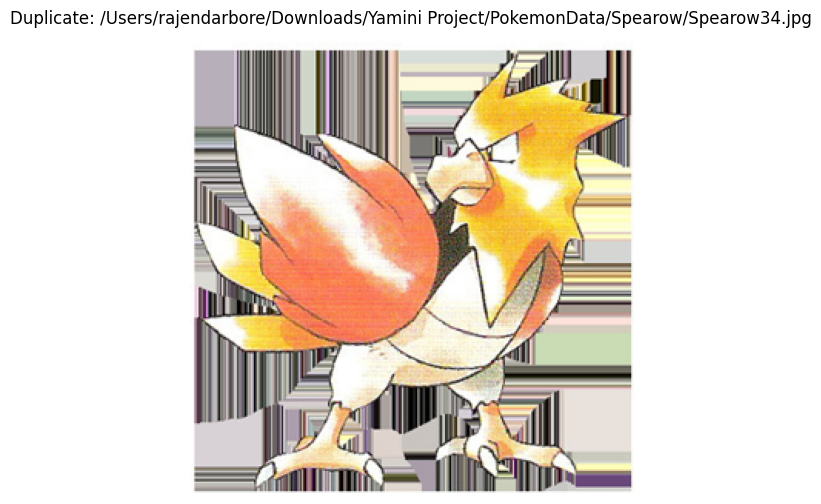

 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Spearow/Spearow12.jpg


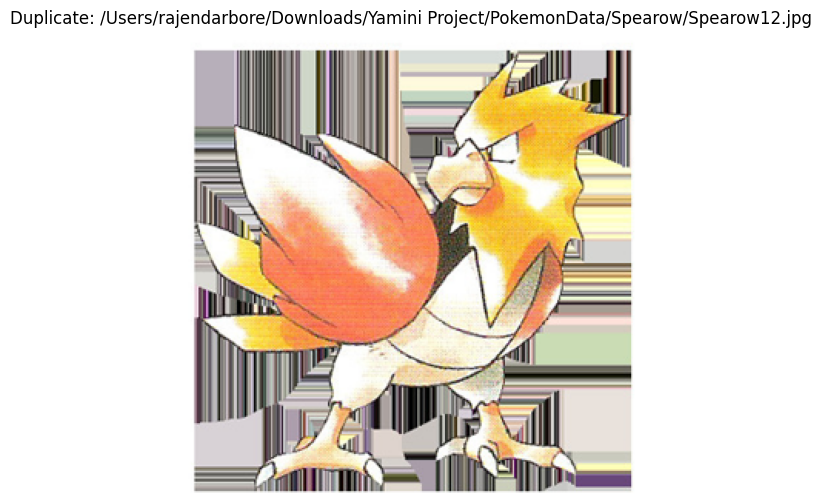

✅ Deleted duplicate image: /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Spearow/Spearow12.jpg
Hash: 7113147a3002cf4b07b289c40db2840a99ec07e566da33c5dd84233dfef5247e
 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Spearow/Spearow31.jpg


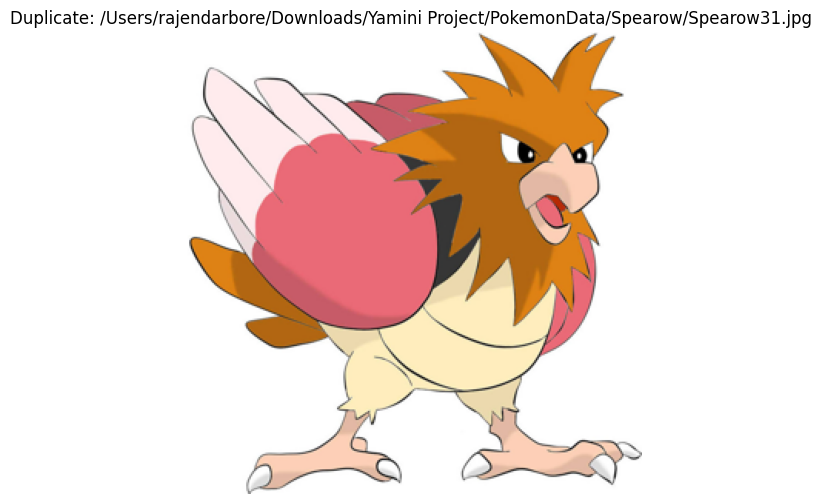

 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Spearow/Spearow49.jpg


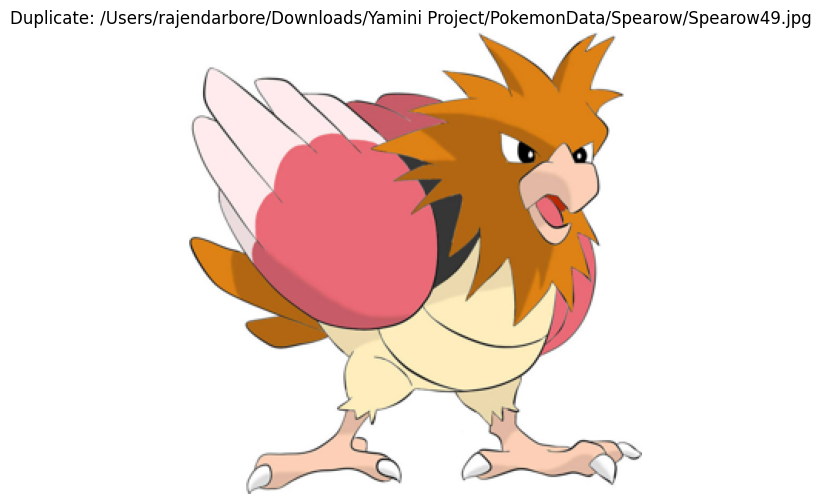

✅ Deleted duplicate image: /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Spearow/Spearow49.jpg
Hash: 4acd3dfffb7e66f7c1d484c4de5e7031a6945dd67882cd8e2a22b7f085842571
 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Squirtle/Squirtle39.jpg


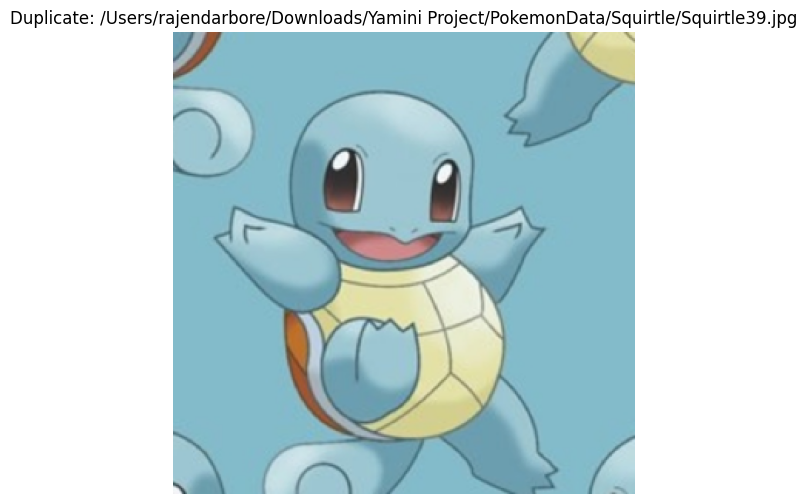

 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Squirtle/Squirtle45.jpg


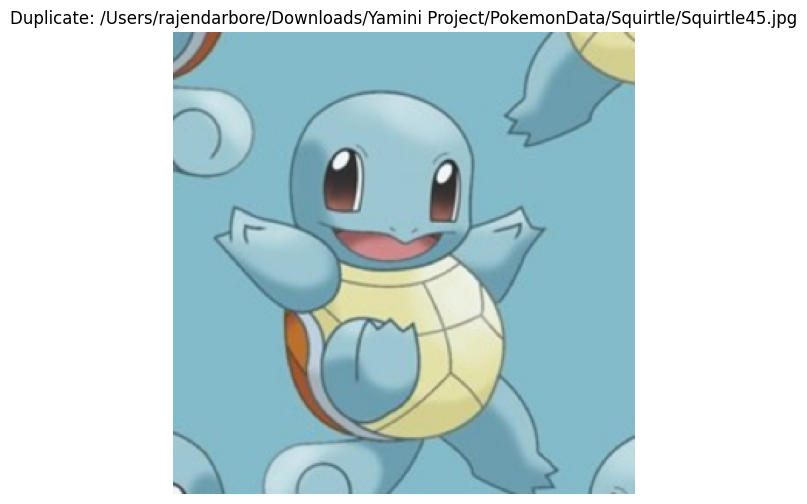

✅ Deleted duplicate image: /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Squirtle/Squirtle45.jpg
Hash: 3a33bb2fbc52dc8cdbc6780637a316c4d16fabaedcda4320f58c981d529c3ff6
 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Squirtle/Squirtle40.png


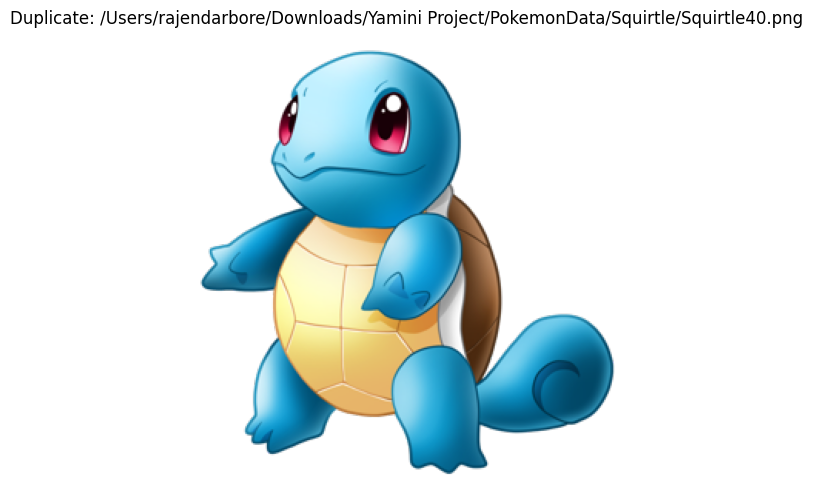

 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Squirtle/Squirtle36.png


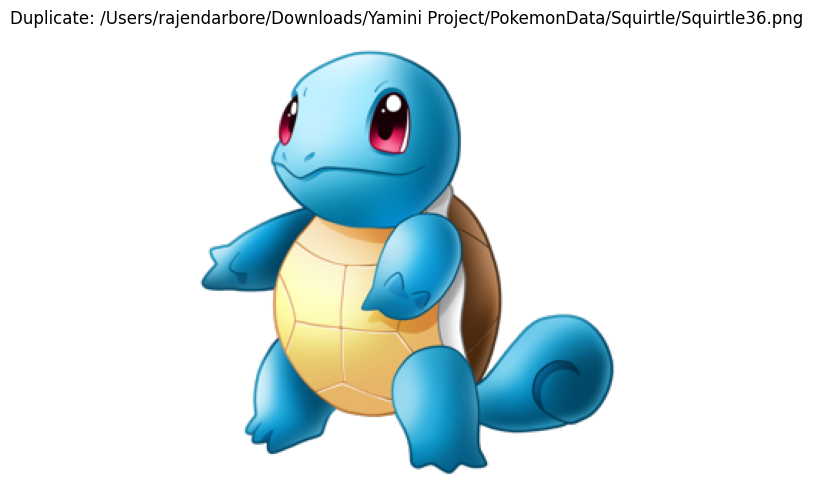

✅ Deleted duplicate image: /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Squirtle/Squirtle36.png
Hash: ec752c84f5bb5fb29d51ac3058f5cbbc823fcdab9cafb754b0f22bfd33d5e3ef
 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Pikachu/Pikachu28.png


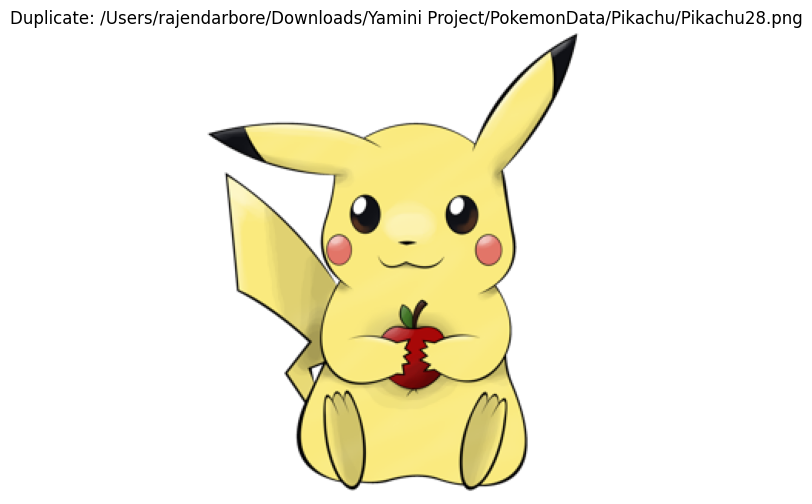

 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Pikachu/Pikachu36.png


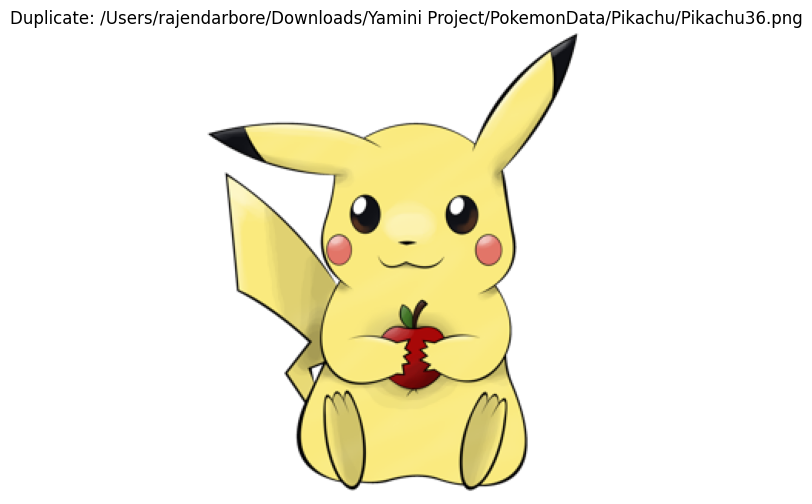

✅ Deleted duplicate image: /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Pikachu/Pikachu36.png
Hash: aa74e29f0d42e253114bbd44e3e9e955cf9f00b648236b6c4a786f3c41a5af15
 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Pikachu/Pikachu35.png


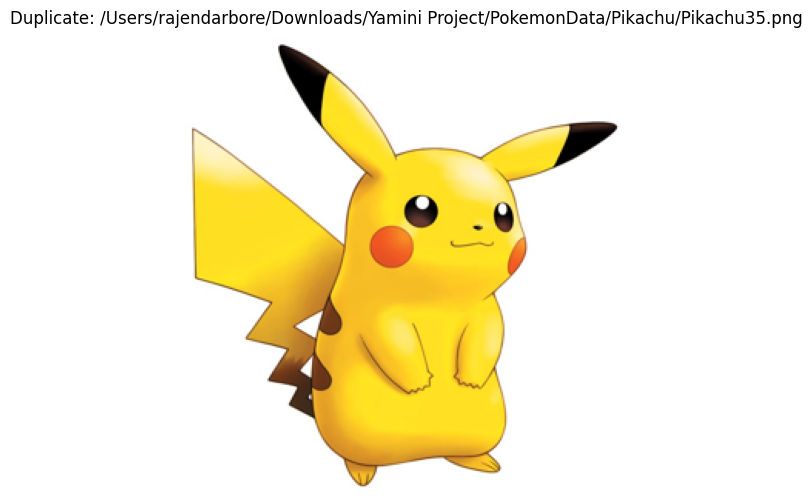

 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Pikachu/Pikachu26.png


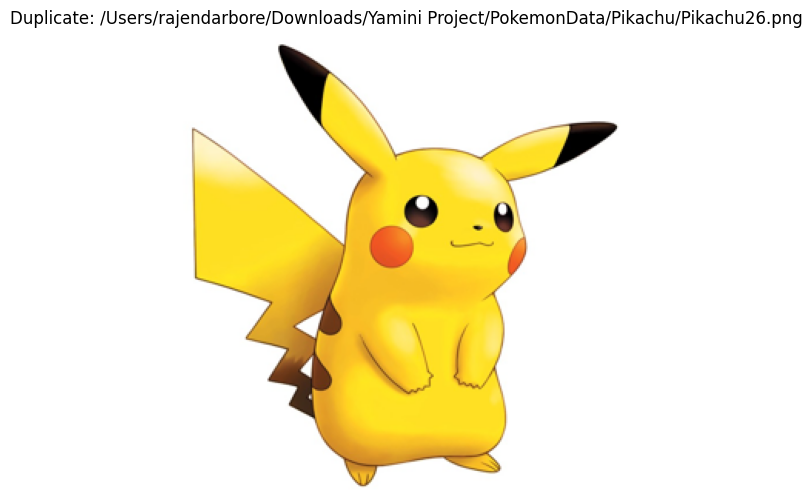

✅ Deleted duplicate image: /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Pikachu/Pikachu26.png
Hash: c6d095455e76c6dcc5114a4b3ddf5254e100acc68c82bbcc2536270c33637043
 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Pikachu/Pikachu24.png


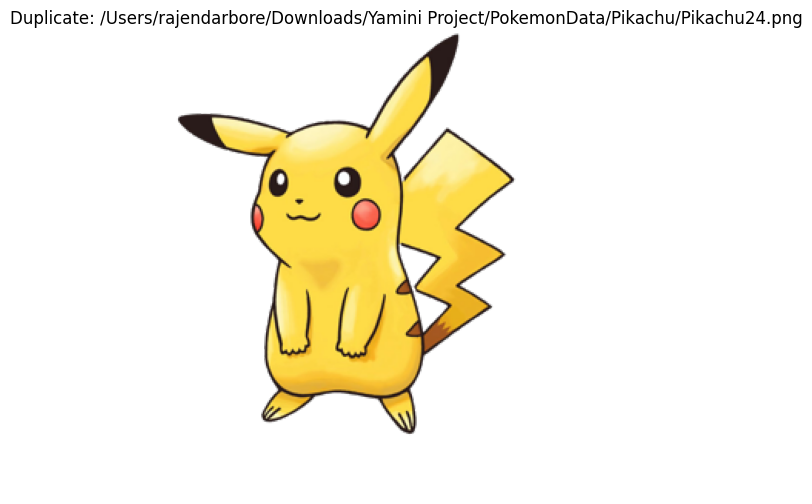

 - /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Pikachu/Pikachu32.png


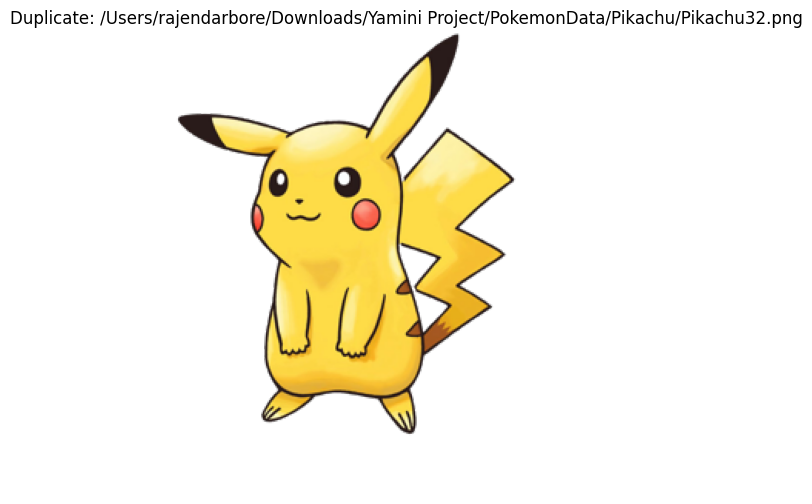

✅ Deleted duplicate image: /Users/rajendarbore/Downloads/Yamini Project/PokemonData/Pikachu/Pikachu32.png


In [ ]:

# Function to calculate the hash of an image file
def get_image_hash(image_path):
    hash_sha256 = hashlib.sha256()
    with open(image_path, 'rb') as f:
        while chunk := f.read(8192):
            hash_sha256.update(chunk)
    return hash_sha256.hexdigest()

# Dictionary to store image hashes and their corresponding file paths
image_hashes = defaultdict(list)

# Loop through all subfolders and images
for folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder)
    
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            try:
                image_hash = get_image_hash(file_path)
                image_hashes[image_hash].append(file_path)
            except Exception as e:
                continue  # Skip non-image files

# Find and print duplicate images
duplicates = {k: v for k, v in image_hashes.items() if len(v) > 1}

if duplicates:
    print("🚨 Found duplicate images:")
    for hash_value, files in duplicates.items():
        print(f"Hash: {hash_value}")
        
        # Display the duplicate images
        for file in files:
            print(f" - {file}")
            try:
                img = Image.open(file)
                
                # Resize image to fit within a manageable size for the display
                img = img.resize((300, 300))  
                
                # Display with reduced size
                plt.figure(figsize=(6, 6))  #  figure size
                plt.title(f"Duplicate: {file}")
                plt.imshow(img)
                plt.axis('off')
                plt.show()
            except Exception as e:
                print(f"⚠️ Could not display image {file}: {e}")
        
        # Delete duplicate images (keep only the first one)
        for file in files[1:]:  # Skip the first file
            try:
                os.remove(file)
                print(f"✅ Deleted duplicate image: {file}")
            except Exception as e:
                print(f"⚠️ Could not delete {file}: {e}")
else:
    print("✅ No duplicate images found.")
